In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
import json
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations. Declare each array as a variable.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.Unpack the zip object into a list so that you only have to create it once.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list. Use Enumerate 
#method to get the index of hte city and the city to create an endpoint URL.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | los angeles
Processing Record 2 of Set 1 | panama city
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | luanda
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | ottumwa
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 13 of Set 1 | sibolga
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | nuuk
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | havelock
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | port hedland
Processing Record 21 of Set 1 | hermanus
Processing Record 22 o

Processing Record 40 of Set 4 | kenai
Processing Record 41 of Set 4 | mahibadhoo
Processing Record 42 of Set 4 | turayf
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | husavik
Processing Record 45 of Set 4 | belaya gora
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | tazovskiy
Processing Record 48 of Set 4 | half moon bay
Processing Record 49 of Set 4 | foundiougne
Processing Record 50 of Set 4 | vikhorevka
Processing Record 1 of Set 5 | ahuimanu
Processing Record 2 of Set 5 | fernley
Processing Record 3 of Set 5 | kathu
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | sulphur springs
Processing Record 6 of Set 5 | richards bay
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | malwan
City not found. Skipping...
Processing Record 9 of Set 5 | altamira
Processing Record 10 of Set 5 | sechura
Processing Record 11 of Set 5 | ostrovnoy


Processing Record 28 of Set 8 | samarai
Processing Record 29 of Set 8 | roald
Processing Record 30 of Set 8 | gladstone
Processing Record 31 of Set 8 | coahuayana
Processing Record 32 of Set 8 | visby
Processing Record 33 of Set 8 | codrington
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | maarianhamina
Processing Record 36 of Set 8 | saint-philippe
Processing Record 37 of Set 8 | araouane
Processing Record 38 of Set 8 | atasu
Processing Record 39 of Set 8 | sumenep
Processing Record 40 of Set 8 | fairfield
Processing Record 41 of Set 8 | finnsnes
Processing Record 42 of Set 8 | nizhniy kuranakh
Processing Record 43 of Set 8 | qostanay
Processing Record 44 of Set 8 | luneville
Processing Record 45 of Set 8 | sudak
Processing Record 46 of Set 8 | szilvasvarad
Processing Record 47 of Set 8 | soe
Processing Record 48 of Set 8 | brigg
Processing Record 49 of Set 8 | eyl
Processing Record 50 of Set 8 | beringovskiy
Processing Record 1 of Set 9 | whyalla
Proce

Processing Record 14 of Set 12 | scarborough
Processing Record 15 of Set 12 | santa cecilia
Processing Record 16 of Set 12 | kobojango
City not found. Skipping...
Processing Record 17 of Set 12 | monrovia
Processing Record 18 of Set 12 | killybegs
Processing Record 19 of Set 12 | maceio
Processing Record 20 of Set 12 | blyth
Processing Record 21 of Set 12 | karamay
City not found. Skipping...
Processing Record 22 of Set 12 | tessalit
Processing Record 23 of Set 12 | kokopo
Processing Record 24 of Set 12 | svetlyy
Processing Record 25 of Set 12 | jizan
Processing Record 26 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 27 of Set 12 | mehamn
Processing Record 28 of Set 12 | vryburg
Processing Record 29 of Set 12 | zhigansk
Processing Record 30 of Set 12 | cayenne
Processing Record 31 of Set 12 | tiarei
Processing Record 32 of Set 12 | kolyshley
Processing Record 33 of Set 12 | guerrero negro
Processing Record 34 of Set 12 | owando
Processing Record 35 of Set 12 | koms

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Los Angeles,34.0522,-118.2437,87.87,21,1,0.00,US,2021-10-15 18:48:10
1,Panama City,8.9936,-79.5197,89.55,68,20,5.75,PA,2021-10-15 18:52:07
2,Mataura,-46.1927,168.8643,39.07,87,100,2.75,NZ,2021-10-15 18:52:17
3,Tuatapere,-46.1333,167.6833,41.16,83,100,6.64,NZ,2021-10-15 18:52:17
4,Luanda,-8.8368,13.2343,75.16,78,4,11.41,AO,2021-10-15 18:51:16
5,Punta Arenas,-53.1500,-70.9167,48.31,57,75,36.82,CL,2021-10-15 18:50:17
6,Provideniya,64.3833,-173.3000,21.24,80,4,6.53,RU,2021-10-15 18:52:18
7,Klaksvik,62.2266,-6.5890,45.52,78,100,16.42,FO,2021-10-15 18:52:19
8,Ottumwa,41.0200,-92.4113,63.28,59,90,8.99,US,2021-10-15 18:52:19
9,Faanui,-16.4833,-151.7500,80.04,73,2,17.56,PF,2021-10-15 18:52:20


In [8]:
#Reorder the columns and print DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Los Angeles,US,2021-10-15 18:48:10,34.0522,-118.2437,87.87,21,1,0.00
1,Panama City,PA,2021-10-15 18:52:07,8.9936,-79.5197,89.55,68,20,5.75
2,Mataura,NZ,2021-10-15 18:52:17,-46.1927,168.8643,39.07,87,100,2.75
3,Tuatapere,NZ,2021-10-15 18:52:17,-46.1333,167.6833,41.16,83,100,6.64
4,Luanda,AO,2021-10-15 18:51:16,-8.8368,13.2343,75.16,78,4,11.41
5,Punta Arenas,CL,2021-10-15 18:50:17,-53.1500,-70.9167,48.31,57,75,36.82
6,Provideniya,RU,2021-10-15 18:52:18,64.3833,-173.3000,21.24,80,4,6.53
7,Klaksvik,FO,2021-10-15 18:52:19,62.2266,-6.5890,45.52,78,100,16.42
8,Ottumwa,US,2021-10-15 18:52:19,41.0200,-92.4113,63.28,59,90,8.99
9,Faanui,PF,2021-10-15 18:52:20,-16.4833,-151.7500,80.04,73,2,17.56


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

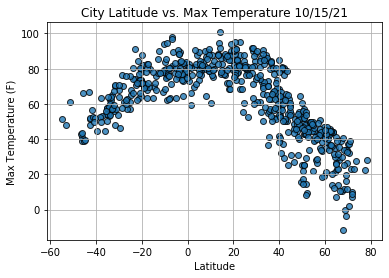

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

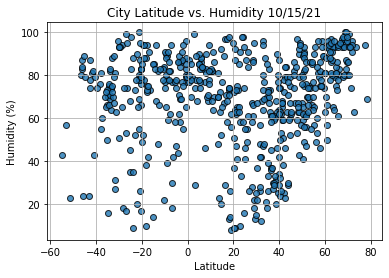

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

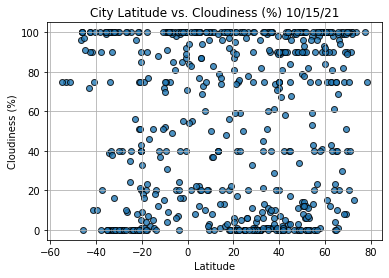

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

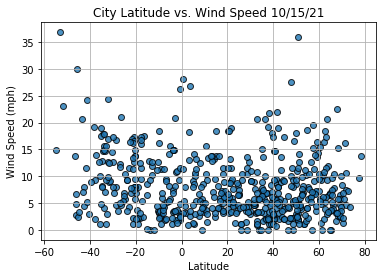

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
#Access one row of the dataframe.
index13 = city_data_df.loc[13]
index13

City                  Pangnirtung
Country                        CA
Date          2021-10-15 18:52:22
Lat                       66.1451
Lng                      -65.7125
Max Temp                     28.4
Humidity                       80
Cloudiness                     20
Wind Speed                   4.61
Name: 13, dtype: object

In [17]:
#Filter data
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
571    False
572     True
573    False
574     True
575     True
Name: Lat, Length: 576, dtype: bool

In [18]:
#Return all data fiting the criteria into a DataFrame.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Los Angeles,US,2021-10-15 18:48:10,34.0522,-118.2437,87.87,21,1,0.00
1,Panama City,PA,2021-10-15 18:52:07,8.9936,-79.5197,89.55,68,20,5.75
6,Provideniya,RU,2021-10-15 18:52:18,64.3833,-173.3000,21.24,80,4,6.53
7,Klaksvik,FO,2021-10-15 18:52:19,62.2266,-6.5890,45.52,78,100,16.42
8,Ottumwa,US,2021-10-15 18:52:19,41.0200,-92.4113,63.28,59,90,8.99


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

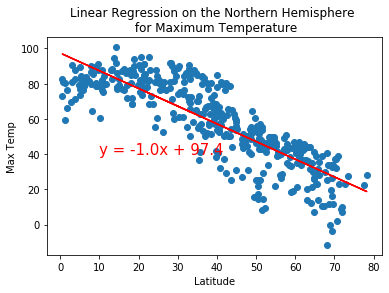

In [20]:
# Call the plot_linear_regression function with x and y values.
# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))                       

In [21]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.838


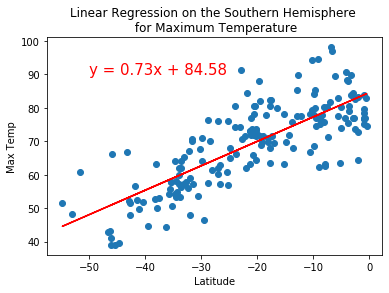

In [22]:
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90)) 

In [23]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.785


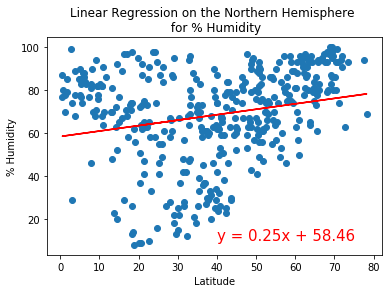

In [24]:
# Linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))                     

In [25]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.228


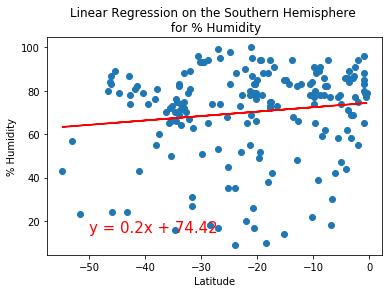

In [26]:
# Linear regression on the Southern Hemisphere for % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))                       

In [27]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.129


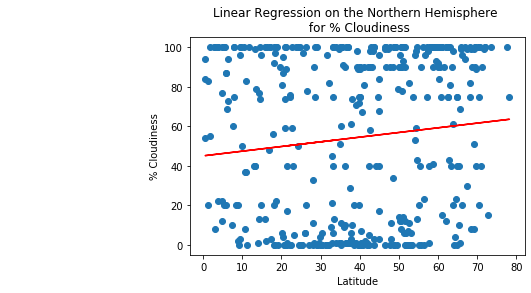

In [28]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))  

In [29]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.113


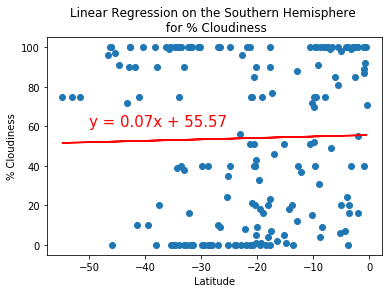

In [30]:
 # Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))  

In [31]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: 0.024


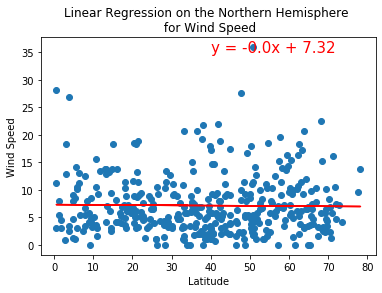

In [32]:
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [33]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.016


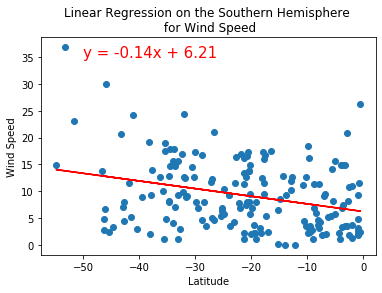

In [34]:
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

In [35]:
(_, _, r_value, _, _) = linregress(x_values, y_values)
print(f"The r-value is: {r_value:.3f}")

The r-value is: -0.303
